# Group 5
## Team members:
- Jianting Liu(8950907)
- David (8999846) 
- Marieth (9016702)


### Use case
The analysis examines the relationship between housing prices, income, and population in Canada over a 20-year period. By incorporating population data alongside existing housing prices and income metrics, we can better understand the demographic pressures on housing affordability.

## load data

In [74]:
import pandas as pd

# read data
df = pd.read_excel('./final_merged_data.xlsx')

# convert column
df_melted = pd.melt(
   df,
   id_vars=['Date','Median income','Population'],  # remain column
   value_vars=['One_storey', 'Two_storey', 'Townhouse', 'Apartment_unit', 'Composite'],  # convert columns
   var_name='property_type',  # new column
   value_name='price'  # new price
)
df_melted
df_melted.to_csv('melted_data.csv', index=False)

df = pd.read_csv('melted_data.csv')


## Converting factor variables to numeric


In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats
from scipy.special import boxcox1p

def convert_factors_to_numeric(df):
    le = LabelEncoder()
    factor_columns = df.select_dtypes(include=['object']).columns
    for col in factor_columns:
        df[col] = le.fit_transform(df[col])
    return df
after_numeric_df= convert_factors_to_numeric(df)
after_numeric_df

,Date,Median income,Population,property_type,price
0,0,4487.500000,1.069167e+07,2,207700
1,1,4487.500000,1.069167e+07,2,208400
2,2,4487.500000,1.069167e+07,2,209200
3,3,4487.500000,1.071352e+07,2,210100
4,4,4487.500000,1.071352e+07,2,210600
...,...,...,...,...,...
1070,210,5066.666667,1.297864e+07,1,765100
1071,211,5066.666667,1.297864e+07,1,749600
1072,212,5066.666667,1.297864e+07,1,739200
1073,213,5066.666667,1.309317e+07,1,731400


## Converting calendar dates to Julian


In [76]:
def convert_dates_to_julian(df, date_column):
    df[f'{date_column}_julian'] = pd.to_datetime(df[date_column]).map(lambda x: x.to_julian_date())
    return df
after_convert_date=convert_dates_to_julian(after_numeric_df,'Date')
after_convert_date

,Date,Median income,Population,property_type,price,Date_julian
0,0,4487.500000,1.069167e+07,2,207700,2440587.5
1,1,4487.500000,1.069167e+07,2,208400,2440587.5
2,2,4487.500000,1.069167e+07,2,209200,2440587.5
3,3,4487.500000,1.071352e+07,2,210100,2440587.5
4,4,4487.500000,1.071352e+07,2,210600,2440587.5
...,...,...,...,...,...,...
1070,210,5066.666667,1.297864e+07,1,765100,2440587.5
1071,211,5066.666667,1.297864e+07,1,749600,2440587.5
1072,212,5066.666667,1.297864e+07,1,739200,2440587.5
1073,213,5066.666667,1.309317e+07,1,731400,2440587.5


## Converting categorical values to dummies
 

In [77]:
def create_dummies(df):
    categorical_columns = ['property_type']
    df_dummies = pd.get_dummies(df, columns=categorical_columns)
    return df_dummies
after_onehot_df = create_dummies(df)
after_onehot_df.head(10)

,Date,Median income,Population,price,Date_julian,property_type_0,property_type_1,property_type_2,property_type_3,property_type_4
0,0,4487.5,1.069167e+07,207700,2440587.5,False,False,True,False,False
1,1,4487.5,1.069167e+07,208400,2440587.5,False,False,True,False,False
2,2,4487.5,1.069167e+07,209200,2440587.5,False,False,True,False,False
3,3,4487.5,1.071352e+07,210100,2440587.5,False,False,True,False,False
4,4,4487.5,1.071352e+07,210600,2440587.5,False,False,True,False,False
5,5,4487.5,1.071352e+07,211400,2440587.5,False,False,True,False,False
6,6,4487.5,1.074758e+07,213600,2440587.5,False,False,True,False,False
7,7,4487.5,1.074758e+07,215900,2440587.5,False,False,True,False,False
8,8,4487.5,1.074758e+07,218400,2440587.5,False,False,True,False,False
9,9,4487.5,1.078444e+07,221000,2440587.5,False,False,True,False,False


## Performing Box-Cox transformations


In [78]:
#only for positive values
def apply_box_cox(df, numeric_columns):
    for col in numeric_columns:
        # positive
        offset = 0
        if min(df[col]) <= 0:
            offset = abs(min(df[col])) + 1
        df[f'{col}_boxcox'] = boxcox1p(df[col] + offset, 0.25)
    return df
numeric_columns = ['Median income','Population']
after_transform = apply_box_cox(after_convert_date,numeric_columns)
after_transform.head(10)

,Date,Median income,Population,property_type,price,Date_julian,Median income_boxcox,Population_boxcox
0,0,4487.5,1.069167e+07,2,207700,2440587.5,28.740499,224.729084
1,1,4487.5,1.069167e+07,2,208400,2440587.5,28.740499,224.729084
2,2,4487.5,1.069167e+07,2,209200,2440587.5,28.740499,224.729084
3,3,4487.5,1.071352e+07,2,210100,2440587.5,28.740499,224.845869
4,4,4487.5,1.071352e+07,2,210600,2440587.5,28.740499,224.845869
5,5,4487.5,1.071352e+07,2,211400,2440587.5,28.740499,224.845869
6,6,4487.5,1.074758e+07,2,213600,2440587.5,28.740499,225.027507
7,7,4487.5,1.074758e+07,2,215900,2440587.5,28.740499,225.027507
8,8,4487.5,1.074758e+07,2,218400,2440587.5,28.740499,225.027507
9,9,4487.5,1.078444e+07,2,221000,2440587.5,28.740499,225.223622


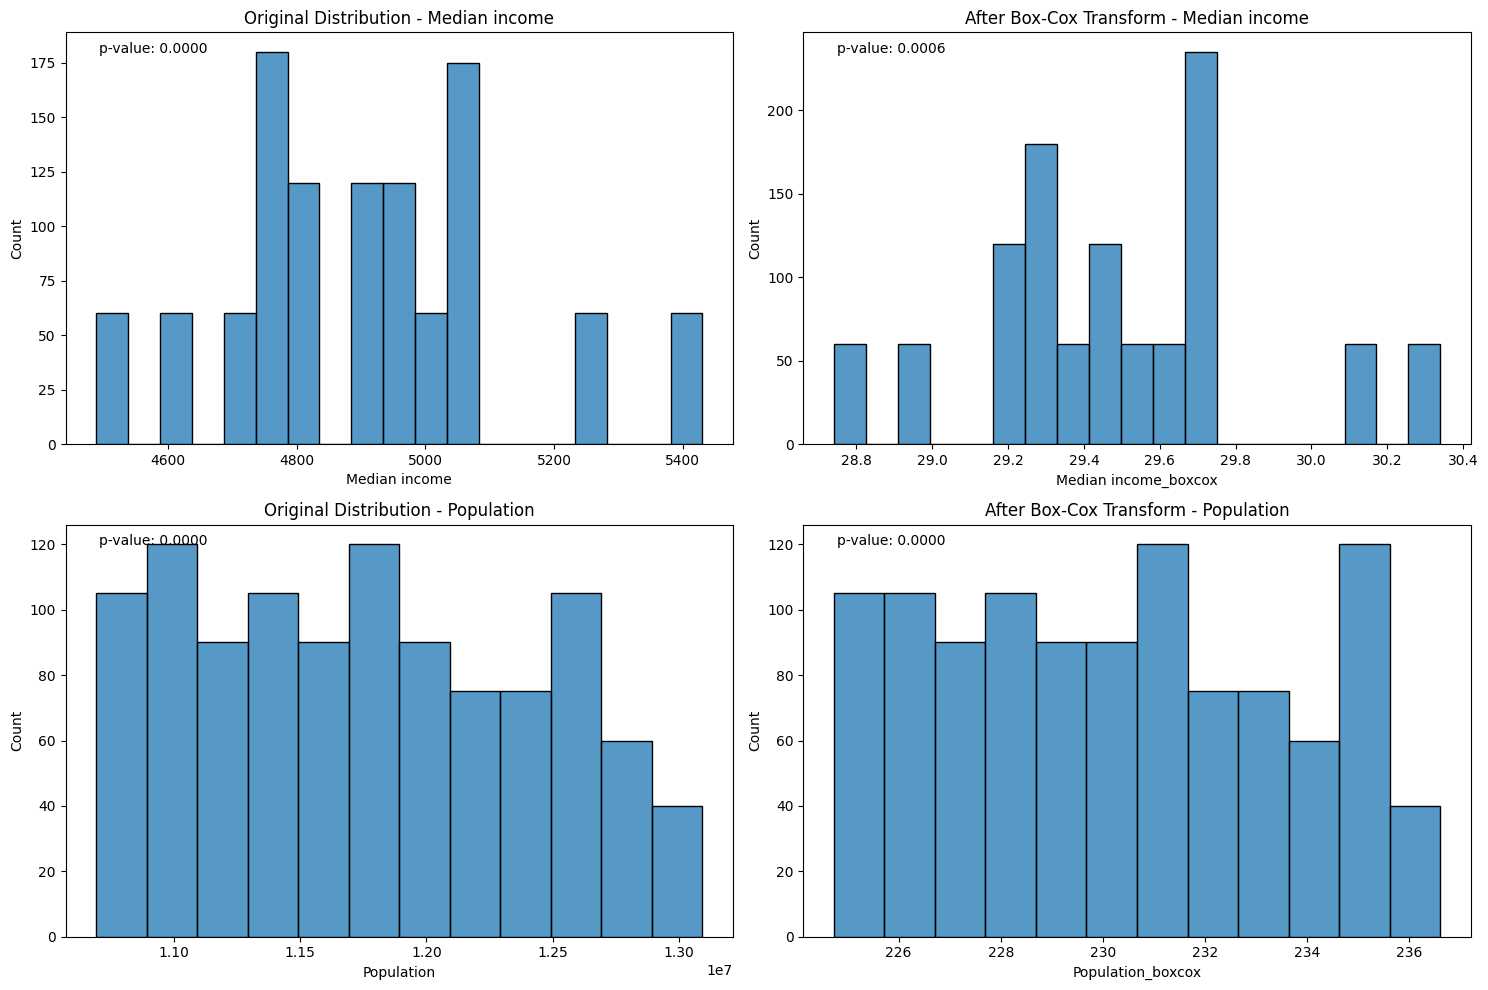

In [79]:
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxcox_distributions(df, numeric_columns):
   n_cols = len(numeric_columns)
   fig, axs = plt.subplots(n_cols, 2, figsize=(15, 5*n_cols))
   
   for idx, col in enumerate(numeric_columns):
       # Original distribution
       sns.histplot(data=df[col], ax=axs[idx,0])
       axs[idx,0].set_title(f'Original Distribution - {col}')
       stat_orig, p_orig = stats.normaltest(df[col])
       axs[idx,0].text(0.05, 0.95, f'p-value: {p_orig:.4f}', 
                      transform=axs[idx,0].transAxes)
       
       # Box-Cox transformed distribution  
       sns.histplot(data=df[f'{col}_boxcox'], ax=axs[idx,1])
       axs[idx,1].set_title(f'After Box-Cox Transform - {col}')
       stat_boxcox, p_boxcox = stats.normaltest(df[f'{col}_boxcox'])
       axs[idx,1].text(0.05, 0.95, f'p-value: {p_boxcox:.4f}',
                      transform=axs[idx,1].transAxes)
   
   plt.tight_layout()
   plt.show()

# Plot distributions
plot_boxcox_distributions(after_transform, numeric_columns)

## Applying Tukey's Ladder


In [80]:
#can handle negtive values and 0
def apply_tukey_ladder(df, numeric_columns):
    for col in numeric_columns:
        df[f'{col}_tukey'] = stats.yeojohnson(df[col])[0]
    return df
after_tukey = apply_tukey_ladder(after_onehot_df,numeric_columns)
after_tukey




,Date,Median income,Population,price,Date_julian,property_type_0,property_type_1,property_type_2,property_type_3,property_type_4,Median income_tukey,Population_tukey
0,0,4487.500000,1.069167e+07,207700,2440587.5,False,False,True,False,False,0.564551,1.101314
1,1,4487.500000,1.069167e+07,208400,2440587.5,False,False,True,False,False,0.564551,1.101314
2,2,4487.500000,1.069167e+07,209200,2440587.5,False,False,True,False,False,0.564551,1.101314
3,3,4487.500000,1.071352e+07,210100,2440587.5,False,False,True,False,False,0.564551,1.101314
4,4,4487.500000,1.071352e+07,210600,2440587.5,False,False,True,False,False,0.564551,1.101314
...,...,...,...,...,...,...,...,...,...,...,...,...
1070,210,5066.666667,1.297864e+07,765100,2440587.5,False,True,False,False,False,0.564551,1.101314
1071,211,5066.666667,1.297864e+07,749600,2440587.5,False,True,False,False,False,0.564551,1.101314
1072,212,5066.666667,1.297864e+07,739200,2440587.5,False,True,False,False,False,0.564551,1.101314
1073,213,5066.666667,1.309317e+07,731400,2440587.5,False,True,False,False,False,0.564551,1.101314


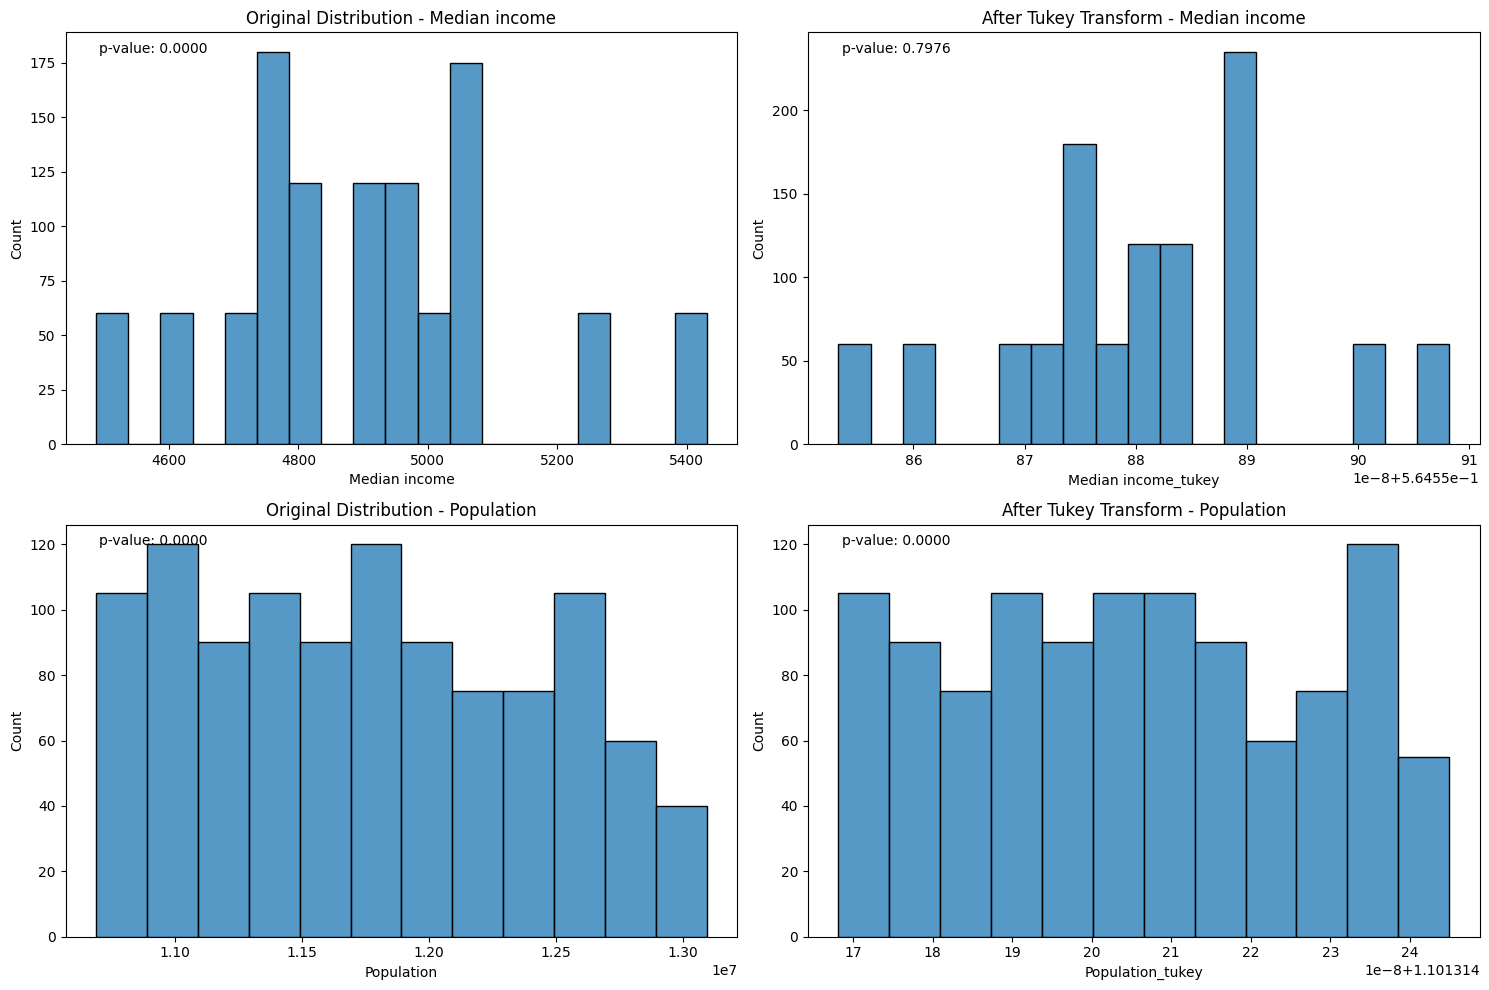

In [81]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(df, numeric_columns):
   n_cols = len(numeric_columns)
   fig, axs = plt.subplots(n_cols, 2, figsize=(15, 5*n_cols))
   
   for idx, col in enumerate(numeric_columns):
       # original data
       sns.histplot(data=df[col], ax=axs[idx,0])
       axs[idx,0].set_title(f'Original Distribution - {col}')
       
       # Tukey
       sns.histplot(data=df[f'{col}_tukey'], ax=axs[idx,1])
       axs[idx,1].set_title(f'After Tukey Transform - {col}')
       
       # normalized test
       stat_orig, p_orig = stats.normaltest(df[col])
       stat_tukey, p_tukey = stats.normaltest(df[f'{col}_tukey'])
       
       axs[idx,0].text(0.05, 0.95, f'p-value: {p_orig:.4f}', 
                      transform=axs[idx,0].transAxes)
       axs[idx,1].text(0.05, 0.95, f'p-value: {p_tukey:.4f}',
                      transform=axs[idx,1].transAxes)
   
   plt.tight_layout()
   plt.show()

# show result
plot_distributions(after_tukey, numeric_columns)

## Perform SLR and MLR methods and analyze the results

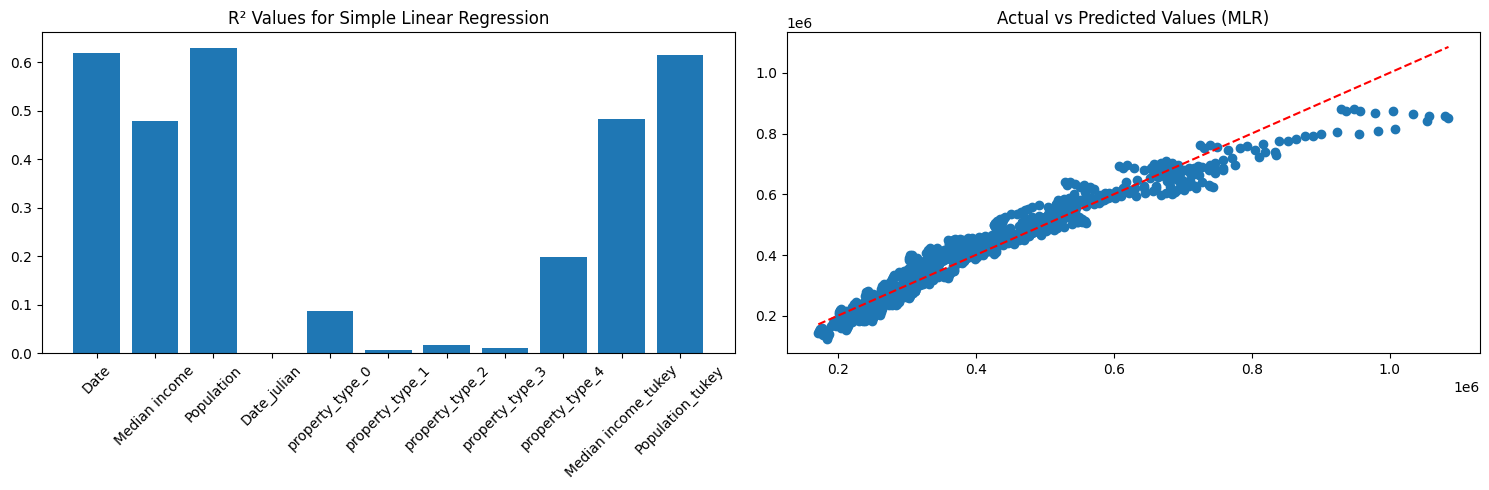

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

def perform_regression_analysis(df, target_column):
    # slr
    def simple_linear_regression(X, y):
        model = LinearRegression()
        X = X.values.reshape(-1, 1)
        model.fit(X, y)
        return model, model.score(X, y)
    
    # slr for every feature
    slr_results = {}
    features = [col for col in df.columns if col != target_column]
    
    for feature in features:
        model, r2 = simple_linear_regression(df[feature], df[target_column])
        slr_results[feature] = {
            'coefficient': model.coef_[0],
            'intercept': model.intercept_,
            'r2': r2
        }
    
    # mlr
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    mlr_model = LinearRegression()
    mlr_model.fit(X_train, y_train)
    
    mlr_results = {
        'coefficients': dict(zip(X.columns, mlr_model.coef_)),
        'intercept': mlr_model.intercept_,
        'r2_train': mlr_model.score(X_train, y_train),
        'r2_test': mlr_model.score(X_test, y_test)
    }
    
    return slr_results, mlr_results

# plot
def plot_regression_results(df, slr_results, mlr_results, target_column):
    # SLR 
    plt.figure(figsize=(15, 5))
    
    # R²
    plt.subplot(121)
    r2_values = {k: v['r2'] for k, v in slr_results.items()}
    plt.bar(r2_values.keys(), r2_values.values())
    plt.xticks(rotation=45)
    plt.title('R² Values for Simple Linear Regression')
    
    # MLR predict vs actual
    plt.subplot(122)
    mlr_model = LinearRegression()
    X = df.drop(target_column, axis=1)
    mlr_model.fit(X, df[target_column])
    y_pred = mlr_model.predict(X)
    
    plt.scatter(df[target_column], y_pred)
    plt.plot([df[target_column].min(), df[target_column].max()],
             [df[target_column].min(), df[target_column].max()],
             'r--')
    plt.title('Actual vs Predicted Values (MLR)')
    
    plt.tight_layout()
    plt.show()
slr_results , mlr_results = perform_regression_analysis(after_tukey,'price')
plot_regression_results(after_tukey, slr_results, mlr_results,'price')

## Perform SLR methods and analyze the results

Model Parameters:
Slope: 301377.59
Intercept: -8478948.47

Training Metrics:
R²: 0.4960
MSE: 13098800491.08

Test Metrics:
R²: 0.4247
MSE: 16162005786.50


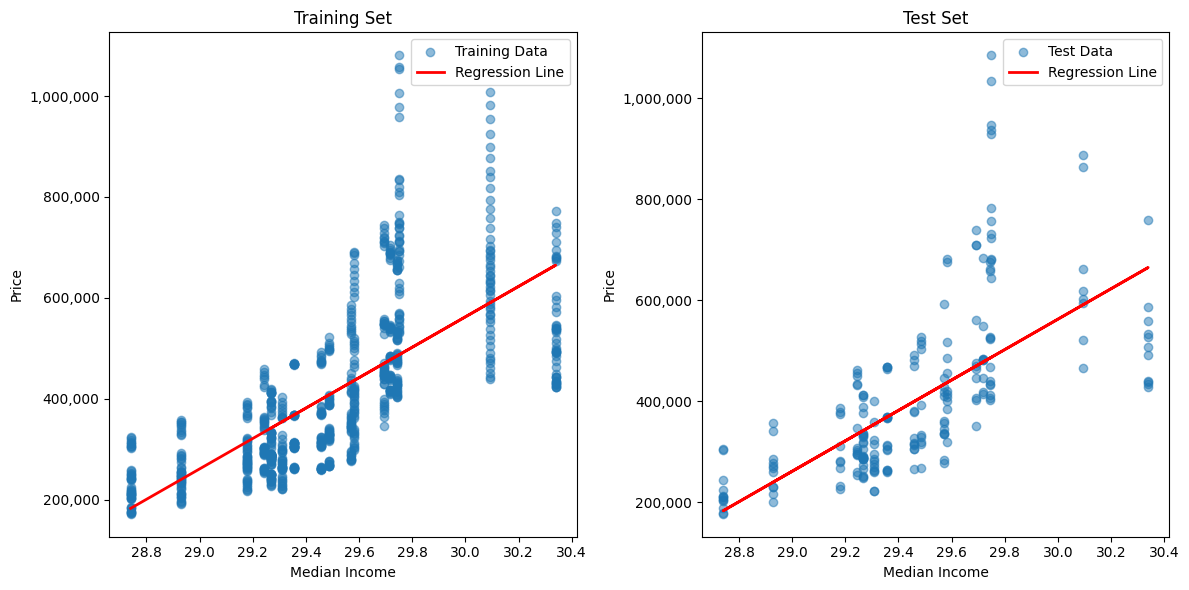

In [83]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_simple_linear_regression(X, y, test_size=0.2, random_state=42):
   """
   Perform simple linear regression analysis
   
   Parameters:
   X: Independent variable (median income)
   y: Dependent variable (price)
   test_size: Size of test set (default 0.2)
   random_state: Random seed (default 42)
   """
   # Reshape X for sklearn
   X = X.values.reshape(-1, 1)
   
   # Split data into training and test sets
   X_train, X_test, y_train, y_test = train_test_split(
       X, y, test_size=test_size, random_state=random_state
   )
   
   # Create and fit model
   model = LinearRegression()
   model.fit(X_train, y_train)
   
   # Make predictions
   y_train_pred = model.predict(X_train)
   y_test_pred = model.predict(X_test)
   
   # Calculate metrics
   train_r2 = r2_score(y_train, y_train_pred)
   test_r2 = r2_score(y_test, y_test_pred)
   train_mse = mean_squared_error(y_train, y_train_pred)
   test_mse = mean_squared_error(y_test, y_test_pred)
   
   # Perform 5-fold cross validation
   cv_scores = cross_val_score(model, X, y, cv=5)
   
   # Create visualization
   plt.figure(figsize=(12, 6))
   
   # Plot training data
   plt.subplot(1, 2, 1)
   plt.scatter(X_train, y_train, alpha=0.5, label='Training Data')
   plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
   plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Regression Line')
   plt.xlabel('Median Income')
   plt.ylabel('Price')
   plt.title('Training Set')
   plt.legend()
   
   # Plot test data
   plt.subplot(1, 2, 2)
   plt.scatter(X_test, y_test, alpha=0.5, label='Test Data')
   plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
   plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Regression Line')
   plt.xlabel('Median Income')
   plt.ylabel('Price')
   plt.title('Test Set')
   plt.legend()
   
   plt.tight_layout()
   
   # Store results
   results = {
       'model': {
           'slope': model.coef_[0],
           'intercept': model.intercept_,
           'equation': f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
       },
       'train_metrics': {
           'r2': train_r2,
           'mse': train_mse
       },
       'test_metrics': {
           'r2': test_r2,
           'mse': test_mse
       }
   }
   
   return results, model, plt

def print_regression_results(results):
   """Print formatted regression analysis results"""
   # Print model parameters
   print("Model Parameters:")
   print(f"Slope: {float(results['model']['slope']):.2f}")
   print(f"Intercept: {float(results['model']['intercept']):.2f}")
   
   # Print training metrics
   print("\nTraining Metrics:")
   print(f"R²: {float(results['train_metrics']['r2']):.4f}")
   print(f"MSE: {float(results['train_metrics']['mse']):.2f}")
   
   # Print test metrics  
   print("\nTest Metrics:")
   print(f"R²: {float(results['test_metrics']['r2']):.4f}")
   print(f"MSE: {float(results['test_metrics']['mse']):.2f}")

# Run analysis
results, model, plt = analyze_simple_linear_regression(after_transform['Median income_boxcox'], after_transform['price'])
print_regression_results(results)

In [84]:
import statsmodels.api as sm

def perform_slr_analysis(X, y):
   """
   Perform Simple Linear Regression analysis using statsmodels
   """
   # Add constant for intercept
   X_const = sm.add_constant(X)
   
   # Fit OLS model
   model = sm.OLS(y, X_const)
   results = model.fit()
   
   # Print summary
   print("\nSimple Linear Regression (SLR) Summary:")
   print(results.summary())
   
   return results
 # Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
      after_transform['Median income_boxcox'], after_transform['price'], test_size=0.2, random_state=42
)
# Use with training data
slr_results = perform_slr_analysis(X_train, y_train)

# Optional: extract specific metrics
print(f"\nKey Metrics:")
print(f"R-squared: {slr_results.rsquared:.3f}")
print(f"F-statistic: {slr_results.fvalue:.3f}")
print(f"AIC: {slr_results.aic:.3f}")


Simple Linear Regression (SLR) Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     844.5
Date:                Tue, 19 Nov 2024   Prob (F-statistic):          8.18e-130
Time:                        13:18:06   Log-Likelihood:                -11237.
No. Observations:                 860   AIC:                         2.248e+04
Df Residuals:                     858   BIC:                         2.249e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

### General Section
- Dependent Variable: price =>This is the variable that the model aims to predict.
- Model: Ordinary Least Squares (OLS): A linear regression method used to minimize the sum of squared differences between observed and predicted values.
- Observations: 860 rows in the data set.

- Degrees of Freedom:
    - From Model: 1(number of predictors in the model).
    - Residuals: 858
- The Adjusted R-squared value of 0.495 indicates that 49.5% of the variance in the dependent variable (price) is explained by the independent variable after adjusting for model complexity.

### Model performance:
- R²: 0.628, the model explains 62.8% of the variability of the dependent variable.
R-squared: 0.496: Indicates that approximately 49.6% of the variance in the dependent variable (price) is explained by the predictor.

-Prob(F-statistic): 8.18× 10-130: Extremely low p-value indicates the model is highly significant.


### Coefficients:
Median income_boxcox (Predictor):
Has a coefficient of 301,400, meaning that for each additional unit increase in Median income_boxcox, the predicted price increases by 301,400 units, on average.

P-value: 0.000, indicating it is highly statistically significant.
Confidence Interval: [281,000, 322,000], which does not include 0, confirming the reliability of this coefficient.

const (Intercept): The intercept has a value of -8,479,000, representing the predicted value of price when Median income_boxcox is 0.

P-value: 0.000, indicating it is highly statistically significant.
Confidence Interval: [-9,088,000, -7,880,000], which does not include 0, confirming its significance.

### Model diagnostics:
- Durbin-Watson: 1.918. This Tests for autocorrelation in residuals. A value near 2 indicates no autocorrelation.
- Omnibus Test: 226.340 (Prob: 0.000). This Tests for normality of residuals. The low p-value indicates residuals are likely not normally distributed.
- Jarque-Bera (JB): 639.981 (Prob: 1.07×10−139): Another test for normality, indicating significant deviation from normality

### Conclusion
- The predictor (Median income_boxcox) is significant in explaining the dependent variable (price) with a highly statistically significant p-value (0.000).
- The model has a moderate adjusted R² (0.495), indicating that it explains about 49.5% of the variability in price. While this suggests a meaningful relationship, there is still considerable variability left unexplained.
- Diagnostic tests indicate potential issues with the normality of residuals (e.g., skewness, kurtosis), which should be investigated further. Additional predictors or transformations may improve the model's performance.


## Perform MLR methods and analyze the results

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define the predictor and response variables
X_mlr = after_transform[['Median income_boxcox', 'Population_boxcox', 'Date_julian']].values  # Multiple predictor variables
y_mlr = after_transform['price'].values  # Response variable

# Split the data into train and test sets
X_mlr_train, X_mlr_test, y_mlr_train, y_mlr_test = train_test_split(X_mlr, y_mlr, test_size=0.2, random_state=42)  # 80% train, 20% test

# Train the MLR model
mlr_model = LinearRegression()
mlr_model.fit(X_mlr_train, y_mlr_train)

# Predictions for the test set
y_test_prediction = mlr_model.predict(X_mlr_test)

# Evaluate the model
print("Model Parameters:")
print(f"MLR Intercept: {mlr_model.intercept_}")
print(f"MLR Coefficients: {mlr_model.coef_}")
print("Metrics")
print(f"MLR R² Score on Test Data: {r2_score(y_mlr_test, y_test_prediction):.2f}")

# Optional: Evaluate on the train set as well
y_train_prediction = mlr_model.predict(X_mlr_train)
print(f"MLR R² Score on Train Data: {r2_score(y_mlr_train, y_train_prediction):.2f}")

Model Parameters:
MLR Intercept: -8085506.397399018
MLR Coefficients: [-55776.1760885   44039.59364318      0.        ]
MLR R² Score on Test Data: 0.64
MLR R² Score on Train Data: 0.63


## Visualize MLR Predictions

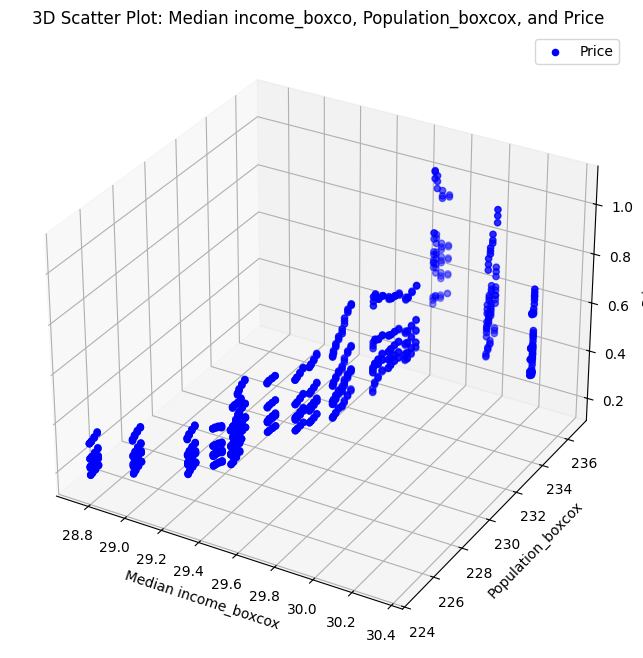

In [86]:
# 3D Plot for MLR with Pop, Child, and Crime (optional)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(after_transform['Median income_boxcox'], after_transform['Population_boxcox'], y_mlr, color='blue', label='Price')
ax.set_xlabel('Median income_boxcox')
ax.set_ylabel('Population_boxcox')
ax.set_zlabel('Price')
plt.title('3D Scatter Plot: Median income_boxco, Population_boxcox, and Price')
plt.legend()
plt.show()

## Evaluate Model Performance (MLR)

In [87]:
#R², MSE

print("\nMultiple Linear Regression (MLR):")
print(f"R² Score: {r2_score(y_mlr_test, y_test_prediction):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_mlr_test, y_test_prediction):.2f}")


Multiple Linear Regression (MLR):
R² Score: 0.64
Mean Squared Error (MSE): 10139644629.72


In [88]:
import statsmodels.api as sm
# The statsmodels to get AIC, BIC, p-values, t-tests, and F-test
# Add a constant to the predictors for statsmodels to include an intercept
X_mlr_train_const = sm.add_constant(X_mlr_train)

In [89]:
# Fit MLR model in statsmodels
sm_mlr_model = sm.OLS(y_mlr_train, X_mlr_train_const).fit()
print("\nMultiple Linear Regression (MLR) Summary:")
print(sm_mlr_model.summary())


Multiple Linear Regression (MLR) Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     722.9
Date:                Tue, 19 Nov 2024   Prob (F-statistic):          1.13e-184
Time:                        13:18:06   Log-Likelihood:                -11107.
No. Observations:                 860   AIC:                         2.222e+04
Df Residuals:                     857   BIC:                         2.223e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1       

### General Section
- Dependent Variable: y, is what the model tries to predict.
- Model: OLS (Ordinary Linear Regression).
- Observations: 860 rows in the data set.
- Degrees of Freedom:
    - From Model: 2 (number of predictors).
    - Residuals: 857 (observations minus estimated parameters).
- Adjusted R²: 0.627, indicating that the model explains 62.7% of the variability of the dependent variable, considering the number of predictors.

### Model performance:

- R²: 0.628, the model explains 62.8% of the variability of the dependent variable.
- Prob (F-statistic): 1.13e-184, an extremely low value confirming that the model is statistically significant.


### Coefficients:

- x1 (First predictor): has a coefficient of -55.780, indicating that for each additional unit of x1, y decreases on average 55.780 units. Its p-value is 0.013, which means that it is statistically significant. The confidence interval is [-99.700, -11.900], which confirms that the coefficient does not include 0.

- x2 (Second predictor): Its coefficient is 44.400, which means that an increase in x2 is associated with an increase of 44.400 units in y. Its p-value is 0.003, which means that it is statistically significant. Its p-value is 0.000, indicating it as highly significant. The confidence interval is [39.100, 49.800], not including 0, which makes it reliable.

- const (Intercept): The value of the intercept is -3.3129, representing the value of y when all predictors are 0. Its p-value is 0.000, indicating it is highly significant.

### Model diagnostics:

- Durbin-Watson: 1.961, indicating little or no autocorrelation in the residuals.
- Prob(Omnibus) and Prob(JB): Low values suggest that the residuals do not follow a normal distribution, which could be a problem for the model assumptions.
- Cond. No.: 1.63e+07, a high value indicating possible multicollinearity among the predictors, which could affect the stability of the model.

### Conclusion
- Both predictors (x1 and x2) are significant in explaining y.
- The model has a reasonable adjusted R² (0.627), indicating that it explains a considerable proportion of the variability.
- There may be issues of multicollinearity and non-normality in the residuals that you should investigate further.